<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Triangulation:


1.   Terminology and basic equations:<br>
2.   K = Intrinsic Matrix (3x3)<br>
3.   [R(3x3), t(1x3)] = extrinsic matrix(3x4)<br>
4.   CAM_Projection (3x4) = K (3x3) @ Transformation_Matrix (3x4)
5.   Transformation_Matrix (3x4) = np.hstack((R(3x3), t(1x3)))<br>







We generate random points in the 3D space and project them into two test views. Then, we add noise to those observations and reconstruct points back in 3D using the OpenCV function cv2.triangulatePoints. As input, the function takes observations from two cameras and camera projection matrices (projective mapping from the world coordinate frame to a view coordinate frame) for each view. It returns the reconstructed points in the world coordinate frame.<br>

In computer vision a camera matrix or (camera) projection matrix is a 3×4 which describes the mapping of a pinhole camera from 3D points in the world to 2D points in an image.



Original points:
[[ 0.572  0.764 -1.298]
 [ 0.808  0.387  0.831]
 [ 1.458 -1.479  0.100]
 [ 1.759  1.295  0.749]
 [ 0.459  0.873 -0.770]]
Reconstructed points:
[[ 0.604  0.630 -1.245]
 [ 0.760  0.388  0.779]
 [ 1.422 -1.447  0.098]
 [ 1.732  1.248  0.734]
 [ 0.545  0.881 -0.850]]


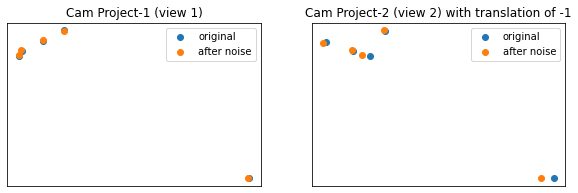

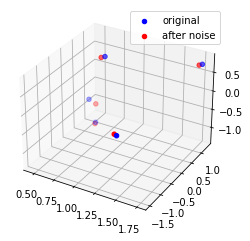

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Generate the test camera's projection matrices or camera matrix: 
# K = Intrinsic Matrix (3x3)
# (R(3x3), t(1x3)) = extrinsic matrix(3x4)
# CAM_Projection (3x4) = K (3x3) @ Transformation_Matrix (3x4)
# Transformation_Matrix (3x4) = np.hstack((R(3x3), t(1x3)))
P1 = np.eye(3, 4, dtype=np.float32)
P2 = np.eye(3, 4, dtype=np.float32)
P2[0, 3] = -1

#Generate 5 test points in the 3D space ():
N = 5
points3d = np.empty((4, N), np.float32)
points3d[:3, :] = np.random.randn(3, N)
points3d[3, :] = 1

#Project the 3D points into two views and add noise:
#view1:  image_points = camera_matrix @ 3D_point 
points1 = P1 @ points3d
points1 = points1[:2, :] / points1[2, :]
points1_orig = np.copy(points1)
points1[:2, :] += np.random.randn(2, N) * 9*1e-2

#view2 with the translation of -1:
points2 = P2 @ points3d
points2 = points2[:2, :] / points2[2, :]
points2_orig = np.copy(points2)
points2[:2, :] += np.random.randn(2, N) * 9*1e-2

#Reconstruct the points from noisy observations:
points3d_reconstr = cv2.triangulatePoints(P1, P2, points1, points2)
points3d_reconstr /= points3d_reconstr[3, :]

#outcome
num_img = 2
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,3), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].scatter(points1_orig[0], points1_orig[1], label='original')
ax[0].scatter(points1[0], points1[1], label='after noise')
ax[0].legend()
ax[0].set_title('Cam Project-1 (view 1)')

ax[1].scatter(points2_orig[0], points2_orig[1], label='original')
ax[1].scatter(points2[0], points2[1], label='after noise')
ax[1].legend()
ax[1].set_title('Cam Project-2 (view 2) with translation of -1')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points3d[:3].T[:,0], points3d[:3].T[:,1], points3d[:3].T[:,2], color='b', label='original')
ax.scatter(points3d_reconstr[:3].T[:,0], points3d_reconstr[:3].T[:,1], points3d_reconstr[:3].T[:,2], color='r', label='after noise')
ax.legend()

print('Original points:')
print(points3d[:3].T)
print('Reconstructed points:')
print(points3d_reconstr[:3].T)

Example 2:

Original 5 Image Points:
 [[-4323.063 -32.139]
 [-51719434697699.148 -46961073462.710]
 [ 1105.467  708.722]
 [ 994.904  1014.924]
 [ 1047.011  865.867]]
5 Image Points after y_translation = -1000:
 [[-13698529191.211  142581279295.845]
 [-4122624158994809.500  7482914607562737.000]
 [-1942854561.516  159607546714.926]
 [-19546061.119  1798120576.221]
 [-506330055.456  49055013142.392]]


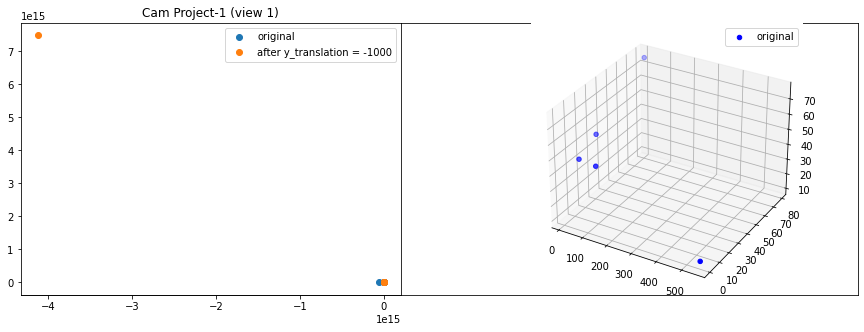

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

xyz= np.array([[95,10,44],
               [550,0.5,10.5],
               [12,13,43],
               [10,79,76],
               [10,30,50]])

rvec_1 = np.zeros(3)
tvec_1 = np.zeros(3)
intrinsics = np.array([[664.632, 0.000, 931.531],
                       [0.000, 663.832, 520.640],
                       [0.000, 0.000, 1.000]])

distortion = np.array([-0.409, 0.216, 0.000, 0.001, -0.072])
image1_points, _ = cv2.projectPoints(xyz, rvec_1, tvec_1, intrinsics, distortion)
print('Original 5 Image Points:\n', image1_points.squeeze().round(4))

# apply translation for second image
y_translation = -1000
# rvec_2 = np.zeros(3)
# tvec_2 = np.zeros(3)
tvec_1[1]=y_translation
image2_points, _ = cv2.projectPoints(xyz, rvec_1, tvec_1, intrinsics, distortion)
print('5 Image Points after y_translation = -1000:\n',image2_points.squeeze().round(4))

#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(image1_points.squeeze().T[0], image1_points.squeeze().T[1], label='original')
ax.scatter(image2_points.squeeze().T[0], image2_points.squeeze().T[1], label='after y_translation = -1000')
ax.legend()
ax.set_title('Cam Project-1 (view 1)')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xyz.T[0], xyz.T[1], xyz.T[2], color='b', label='original')
ax.legend()

Example-x <br>
So the setting is given a coordinate system shown below where the z-axis is pointing out of the screen (towards you), the camera focal length is 270 pixels and image resolution is 640x480, then we have an object somewhere in 3D space, and two drones d1 and d2 taking two observations at two different viewpoints, where is d1 is at (6, 3, 2) and the corresponding image coordinate of the object is (320, 280), and that of d2 is (9.5, 4.5, 3) and (160, 408), also the heading of d1 is -20 degrees from the y-axis and that of d2 is +30 degrees from y-axis, the goal is to determine (x, y, z) where the object is at, the drones are hovering over the xy plane
<img src="https://i.stack.imgur.com/vHI9a.png" width="400"/>

Given the information, by letting d1 be the reference frame, we can have the camera intrinsics K = [[270, 0, 320], [0, 270, 240], [0, 0, 1]], the transformation is rotate +50 degrees with z-axis as the rotation axis, and translation t = [3.5, 1.5, 1]


3D location of the point:
 [[-0.428]
 [ 1.956]
 [ 9.072]]


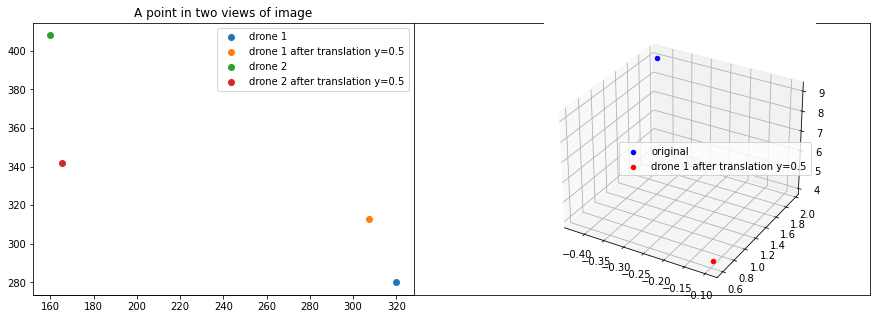

In [106]:
def pixel2cam(pt, K):
    u = (pt[0] - K[0][2]) / K[0][0]
    v = (pt[1] - K[1][2]) / K[1][1]
    return np.array([u, v], dtype=np.float32)

def triangulate(points_1, points_2, K, R, t):
    T1 = np.array([[1, 0, 0, 0], 
                   [0, 1, 0, 0], 
                   [0, 0, 1, 0]], dtype=np.float32)
    T2 = np.hstack((R, t))
    # print(T2)
    proj1 = np.matmul(K, T1)
    proj2 = np.matmul(K, T2)
    # print(proj1, '\n',proj2)
    X = cv2.triangulatePoints(proj1, proj2, points_1, points_2)
    X /= X[3]
    return X

K = np.array([[270, 0, 320], [0, 270, 240], [0, 0, 1]], dtype=np.float32)
# rotate +50 degrees along z axis
rotation_vector = np.array([0, -50 / 180 * np.pi, 0])
R, _ = cv2.Rodrigues(rotation_vector)
t = np.array([[3.5], [1.5], [1]], dtype=float)

pt_1 = (320, 280)
pt_2 = (160, 408)

X = triangulate(pt_1, pt_2, K, R, t)
print('3D location of the point:\n', X[:3])

#project point after d1 translation
rvec_1 = np.zeros(3)
tvec_1 = np.zeros(3)
tvec_1[1]=0.5
intrinsics = K
distortion = np.array([0.0, 0.0, 0.000, 0.00, 0.0])
d1_pt_3, _ = cv2.projectPoints(X[:3], rvec_1, tvec_1, intrinsics, distortion)

#determine 3D world location point after d1 translation
T1 = np.array(
    [[1, 0, 0, 0], 
    [0, 1, 0, 0], 
    [0, 0, 1, 0]], dtype=np.float32)
proj1 = np.matmul(K, T1)
T2 = T1.copy()
T2[:,3] = tvec_1
proj2 = np.matmul(K, T2)
d1_X2 = cv2.triangulatePoints(proj1, proj2, pt_1, d1_pt_3)
d1_X2 /= d1_X2[3]

#project point after d2 translation
rvec_1 = np.array([0, -50 / 180 * np.pi, 0])
tvec_1 = np.array([[3.5], [1.5], [1]], dtype=float)
tvec_1[1]=0.5
d2_pt_4, _ = cv2.projectPoints(X[:3], rvec_1, tvec_1, intrinsics, distortion)

#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter((320), (280), label='drone 1')
ax.scatter(d1_pt_3.squeeze()[0], d1_pt_3.squeeze()[1], label='drone 1 after translation y=0.5')
ax.scatter((160), (408), label='drone 2')
ax.scatter(d2_pt_4.squeeze()[0], d2_pt_4.squeeze()[1], label='drone 2 after translation y=0.5')
# ax.scatter(points2[:,:2].T[0], points2[:,:2].T[1], label='after noise')
ax.legend()
ax.set_title('A point in two views of image')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X[:3][0], X[:3][1], X[:3][2], color='b', label='original')
ax.scatter(d1_X2[:3][0], d1_X2[:3][1], d1_X2[:3][2], color='r', label='drone 1 after translation y=0.5')
ax.legend()

Example-3:<br>
cv2.triangulatePoints is a function of OpenCV that can calculate the coordinates of three-dimensional points. It takes as input two projection matrices and the corresponding coordinates of a point on the image, and outputs the coordinates of the point in 3D space.

Here is a sample code using cv2.triangulatePoints:

[[-0.481  0.033  0.000]
 [-0.481  0.030  0.000]
 [-0.480  0.029  0.000]]


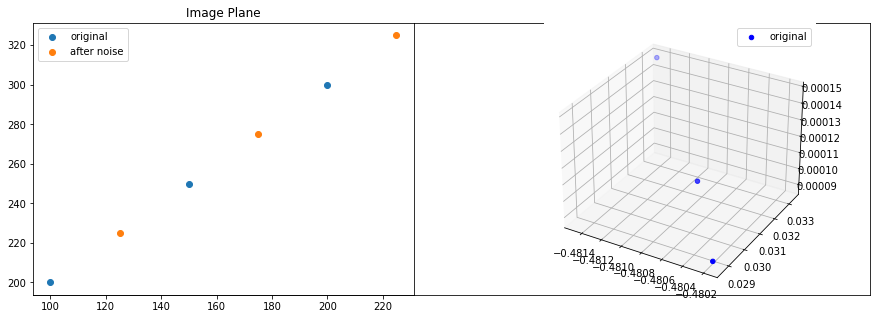

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create two projection matrices for the left and right cameras
P1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
P2 = np.array([[1, 0, 0, 0.5], [0, 1, 0, 0], [0, 0, 1, 0]])

# Create an array of 2D points in the left and right images
points1 = np.array([[100, 200], [150, 250], [200, 300]])
points2 = np.array([[125, 225], [175, 275], [225, 325]])

# Convert the points to homogeneous coordinates
points1 = np.concatenate((points1, np.ones((points1.shape[0], 1))), axis=1)
points2 = np.concatenate((points2, np.ones((points2.shape[0], 1))), axis=1)

# Triangulate the points to find their 3D coordinates
# points3D = cv2.triangulatePoints(P1, P2, points1.T, points2.T)
points3D = cv2.triangulatePoints(P1[:3], P2[:3], points1.T[:2], points2.T[:2])

# Convert the points back to non-homogeneous coordinates
points3D = points3D / points3D[3]

# Print the 3D coordinates
print(points3D[:3].T)

#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(points1[:,:2].T[0], points1[:,:2].T[1], label='original')
ax.scatter(points2[:,:2].T[0], points2[:,:2].T[1], label='after noise')
ax.legend()
ax.set_title('Image Plane')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(points3D[:3][0], points3D[:3][1], points3D[:3][2], color='b', label='original')
ax.legend()

Example-4:

In [4]:
import numpy as np
# Camera projection matrices
P1 = np.eye(4)
P2 = np.array([[ 0.878, -0.01 ,  0.479, -1.995],
            [ 0.01 ,  1.   ,  0.002, -0.226],
            [-0.479,  0.002,  0.878,  0.615],
            [ 0.   ,  0.   ,  0.   ,  1.   ]])
# Homogeneous arrays
a3xN = np.array([[ 0.091,  0.167,  0.231,  0.083,  0.154],
              [ 0.364,  0.333,  0.308,  0.333,  0.308],
              [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])
b3xN = np.array([[ 0.42 ,  0.537,  0.645,  0.431,  0.538],
              [ 0.389,  0.375,  0.362,  0.357,  0.345],
              [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])
# The cv2 method
X = cv2.triangulatePoints( P1[:3], P2[:3], a3xN[:2], b3xN[:2] )
# Remember to divide out the 4th row. Make it homogeneous
X /= X[3]
# Recover the origin arrays from PX
x1 = np.dot(P1[:3],X)
x2 = np.dot(P2[:3],X)
# Again, put in homogeneous form before using them
x1 /= x1[2]
x2 /= x2[2]
 
print ('X\n', X)
print ('x1\n', x1)
print ('x2\n', x2)

X
 [[ 1.00277401  2.00861221  3.01259262  1.00350119  2.01054271]
 [ 4.01217993  4.01031008  4.01743742  4.02958919  4.01894571]
 [11.01977924 12.02856882 13.04163081 12.09159201 13.05497299]
 [ 1.          1.          1.          1.          1.        ]]
x1
 [[0.09099765 0.1669868  0.23099815 0.08299165 0.15400589]
 [0.36408896 0.33339877 0.30804717 0.33325547 0.30784788]
 [1.         1.         1.         1.         1.        ]]
x2
 [[0.42002058 0.53709198 0.64501084 0.43105651 0.5379664 ]
 [0.38890031 0.37453153 0.36194222 0.35671333 0.34517832]
 [1.         1.         1.         1.         1.        ]]


Example-5

Triangulate 3d points - units in meters
Projected point from openCV: [[-0.035 -0.006  2.022  1.000]]
Projected point from 2 camera views: [-0.034 -0.006  2.023  1.000]
Projected point from 3 camera views: [-0.004  0.062  2.011  1.000]
Projected points from openCV:
 [[-0.035 -0.006  2.022  1.000]
 [-0.015 -0.006  2.018  1.000]]
Projected point from SFM:
 [[-0.034 -0.006  2.023  1.000]
 [-0.015 -0.006  2.019  1.000]]


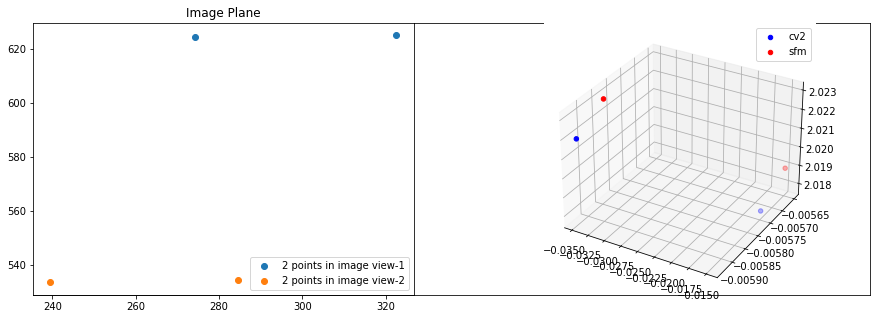

In [43]:
from __future__ import print_function
import numpy as np
import cv2
import time

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})


def triangulate_nviews(P, ip):
    """
    Triangulate a point visible in n camera views.
    P is a list of camera projection matrices.
    ip is a list of homogenised image points. eg [ [x, y, 1], [x, y, 1] ], OR,
    ip is a 2d array - shape nx3 - [ [x, y, 1], [x, y, 1] ]
    len of ip must be the same as len of P
    """
    if not len(ip) == len(P):
        raise ValueError('Number of points and number of cameras not equal.')
    n = len(P)
    M = np.zeros([3*n, 4+n])
    for i, (x, p) in enumerate(zip(ip, P)):
        M[3*i:3*i+3, :4] = p
        M[3*i:3*i+3, 4+i] = -x
    V = np.linalg.svd(M)[-1]
    X = V[-1, :4]
    return X / X[3]


def triangulate_points(P1, P2, x1, x2):
    """
    Two-view triangulation of points in
    x1,x2 (nx3 homog. coordinates).
    Similar to openCV triangulatePoints.
    """
    if not len(x2) == len(x1):
        raise ValueError("Number of points don't match.")
    X = [triangulate_nviews([P1, P2], [x[0], x[1]]) for x in zip(x1, x2)]
    return np.array(X)


# -----------------------------------------------------------------------------
# Data
# -----------------------------------------------------------------------------

# 3 camera projection matrices
P1 = np.array([[5.010e+03, 0.000e+00, 3.600e+02, 0.000e+00],
               [0.000e+00, 5.010e+03, 6.400e+02, 0.000e+00],
               [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]])

P2 = np.array([[5.037e+03, -9.611e+01, -1.756e+03, 4.284e+03],
               [2.148e+02,  5.354e+03,  1.918e+02, 8.945e+02],
               [3.925e-01,  7.092e-02,  9.169e-01, 4.930e-01]])

P3 = np.array([[5.217e+03,  2.246e+02,  2.366e+03, -3.799e+03],
               [-5.734e+02,  5.669e+03,  8.233e+02, -2.567e+02],
               [-3.522e-01, -5.839e-02,  9.340e-01,  6.459e-01]])

# 3 corresponding image points - nx2 arrays, n=1
x1 = np.array([[274.128, 624.409]])
x2 = np.array([[239.571, 533.568]])
x3 = np.array([[297.574, 549.260]])

# 3 corresponding homogeneous image points - nx3 arrays, n=1
x1h = np.array([[274.128, 624.409, 1.0]])
x2h = np.array([[239.571, 533.568, 1.0]])
x3h = np.array([[297.574, 549.260, 1.0]])

# 3 corresponding homogeneous image points - nx3 arrays, n=2
x1h2 = np.array([[274.129, 624.409, 1.0], [322.527, 624.869, 1.0]])
x2h2 = np.array([[239.572, 533.568, 1.0], [284.507, 534.572, 1.0]])
x3h2 = np.array([[297.575, 549.260, 1.0], [338.942, 546.567, 1.0]])


# -----------------------------------------------------------------------------
# Test
# -----------------------------------------------------------------------------

print('Triangulate 3d points - units in meters')
# triangulatePoints requires 2xn arrays, so transpose the points
p = cv2.triangulatePoints(P1, P2, x1.T, x2.T)
# however, homgeneous point is returned
p /= p[3]
print('Projected point from openCV:',  p.T)

p = triangulate_nviews([P1, P2], [x1h, x2h])
print('Projected point from 2 camera views:',  p)

p = triangulate_nviews([P1, P2, P3], [x1h, x2h, x3h])
print('Projected point from 3 camera views:',  p)

# cv2 two image points - not homgeneous on input
p_cv = cv2.triangulatePoints(P1, P2, x1h2[:, :2].T, x2h2[:, :2].T)
p_cv /= p_cv[3]
print('Projected points from openCV:\n', p_cv.T)

p_sfm = triangulate_points(P1, P2, x1h2, x2h2)
print('Projected point from SFM:\n',  p_sfm)


#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x1h2[:,:2].T[0], x1h2[:,:2].T[1], label='2 points in image view-1')
ax.scatter(x2h2[:,:2].T[0], x2h2[:,:2].T[1], label='2 points in image view-2')
ax.legend()
ax.set_title('Image Plane')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(p_cv[:3][0], p_cv[:3][1], p_cv[:3][2], color='b', label='cv2')
ax.scatter(p_sfm.T[:3][0], p_sfm.T[:3][1], p_sfm.T[:3][2], color='r', label='sfm')
ax.legend()

Example-x

In [112]:
!pip -q install scikit-surgerycalibration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00


In [114]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import sksurgerycalibration.video.video_calibration_utils as vu

"""
Test to ensure we can project and triangulate using OpenCV.
"""
# intrinsics = np.loadtxt(f'calibration/mac_calibration/intrinsics.txt')
# print(f"\nIntrinsics shape:{intrinsics.shape}")

# distortion = np.loadtxt(f'calibration/mac_calibration/distortion.txt')
# print(f"Distortion shape:{distortion.shape}")

intrinsics = np.array([[664.632, 0.000, 931.531],
                       [0.000, 663.832, 520.640],
                       [0.000, 0.000, 1.000]])

distortion = np.array([-0.409, 0.216, 0.000, 0.001, -0.072])

# Create reference points. This is in 3D, in camera space. i.e. along z-axis.
points_on_z_axis = np.array([[0.0, 0.0, 200.0]])

# Project to first camera. Notice that rvec, and tvec are zero, so it's the identity matrix.
projected_points_1, _ = cv2.projectPoints(points_on_z_axis,
                                            rvec=np.zeros((1, 3)), # No rotations or translations, so world coords==camera coords.
                                            tvec=np.zeros((1, 3)),
                                            cameraMatrix=intrinsics,
                                            distCoeffs=distortion)

# Note, that with 1 point, the shape of projected_points is [1, 1, 2]. So, its 1 rows, of a 1x2 row vector.
# For the sake of unit testing, points on z-axis should project to centre of projection, given by intrinsic matrix principle point.
assert np.isclose(projected_points_1[0][0][0], intrinsics[0][2])
assert np.isclose(projected_points_1[0][0][1], intrinsics[1][2])

# So, lets create a second camera. No rotation. Just translate in x.
extrinsics_matrix = np.eye(4, 4)
extrinsics_matrix[0][3] = 10
rvec_1, tvec_1 = vu.extrinsic_matrix_to_vecs(extrinsics_matrix)

# Project to 2nd camera.
projected_points_2, _ = cv2.projectPoints(points_on_z_axis,
                                            rvec=rvec_1,
                                            tvec=tvec_1,
                                            cameraMatrix=intrinsics,
                                            distCoeffs=distortion)

assert not (np.isclose(projected_points_2[0][0][0], intrinsics[0][2])) # As the x-position SHOULD have changed.
assert np.isclose(projected_points_2[0][0][1], intrinsics[1][2])       # As the y-position should NOT have changed.

# Firstly: Triangulation in OpenCV only works on undistorted points.
# Secondly: There are 2 ways to sort out the intrinsics.
#
# Option A: Do NOT pass intrinsics as the 5th argument to undistort points.
#           The undistorted points are then normalised.
#           The triangulation process then HAS to use the identity matrix as the intrinsics.
#
#           undistorted_0 = cv2.undistortPoints(projected_points, intrinsics, distortion) # so, undistorted points normalised.
#           p_0 = identity @ ext_0                                                        # so, DONT use intrinsics
#           p_1 = identity @ ext_0                                                        # so, DONT use intrinsics
#
# Option B: DO pass intrinsics as the 5th argument to undistort points.
#           The undistorted points are then in pixel coordiates.
#           The triangulation process then MUST use the intrinsics matrix.
#
#           undistorted_0 = cv2.undistortPoints(projected_points, intrinsics, distortion, None, intrinsics) # so, undistorted points in pixels.
#           p_0 = intrinsics @ ext_0                                                                        # so, DO use intrinsics
#           p_1 = intrinsics @ ext_0                                                                        # so, DO use intrinsics
#
# Both options are equivalent. You just must be consistent, and pick one. Let's pick option B.

projected_points_1_undistorted = cv2.undistortPoints(projected_points_1, intrinsics, distortion, None, intrinsics)
projected_points_2_undistorted = cv2.undistortPoints(projected_points_2, intrinsics, distortion, None, intrinsics)

projected_points_1_undistorted_squeezed = projected_points_1_undistorted.squeeze(1)
projected_points_2_undistorted_squeezed = projected_points_2_undistorted.squeeze(1)

print(f"projected_points_1_undistorted_squeezed is:\n{projected_points_1_undistorted_squeezed}")
print(f"projected_points_2_undistorted_squeezed is:\n{projected_points_2_undistorted_squeezed}")

# First camera, we say has a world_to_camera matrix of identity.
r_0 = np.eye(3, 3)
ext_0 = np.zeros((3, 4))
ext_0[:3, :3] = r_0
p_0 = intrinsics @ ext_0
print(f"p_0 is:\n{p_0}")

# Second camera, has a different world_to_camera matrix.
ext_tmp = vu.extrinsic_vecs_to_matrix(rvec_1, tvec_1)
ext_1 = np.zeros((3, 4))
ext_1[:3, :3] = ext_tmp[:3, :3]
ext_1[:3, 3] = ext_tmp[:3, 3]
p_1 = intrinsics @ ext_1
print(f"p_1 is:\n{p_1}")

homogeneous_triangulated_points = cv2.triangulatePoints(projMatr1=p_0,
                                                        projMatr2=p_1,
                                                        projPoints1=np.transpose(projected_points_1_undistorted_squeezed),
                                                        projPoints2=np.transpose(projected_points_2_undistorted_squeezed))
triangulated_points = cv2.convertPointsFromHomogeneous(np.transpose(homogeneous_triangulated_points))

# Moment of truth.
print(triangulated_points)

# Check that this equals the point we put in: points_on_z_axis = np.array([[0.0, 0.0, 200.0]])
assert np.isclose(triangulated_points[0][0][0], points_on_z_axis[0][0])
assert np.isclose(triangulated_points[0][0][1], points_on_z_axis[0][1])
assert np.isclose(triangulated_points[0][0][2], points_on_z_axis[0][2])



projected_points_1_undistorted_squeezed is:
[[ 931.531  520.640]]
projected_points_2_undistorted_squeezed is:
[[ 964.763  520.640]]
p_0 is:
[[ 664.632  0.000  931.531  0.000]
 [ 0.000  663.832  520.640  0.000]
 [ 0.000  0.000  1.000  0.000]]
p_1 is:
[[ 664.632  0.000  931.531  6646.320]
 [ 0.000  663.832  520.640  0.000]
 [ 0.000  0.000  1.000  0.000]]
[[[-0.000 -0.000  200.000]]]
